In [3786]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3787]:
import yfinance as yf

In [3788]:
list=["TSLA","AAPL","CAT","GE","GOOG","NVDA","MSFT","SNOW","XOM","CVX","UBER","BRK-B","^GSPC","WMT"]
val = input("Enter your stock  ticker from the following list: \n1.TSLA\n2.AAPL\n3.CAT \n4.GE\n5.GOOG\n6.NVDA\n7.MSFT\n8.SNOW\n9.XOM\n10.CVX\n11.UBER\n12.BRK-B\n13.^GSPC\n14.WMT\n")
val2=int(input("Choose the option for number of years: \n 1. 1 year 2. 3 years 3. 5 years\n"))
if val2 == 1:
  val2="2023-01-01"
elif val2 == 2:
  val2="2021-01-01"
elif val2 == 3:
  val2="2019-01-01"
else:
  print("Wrong option for number of years")

if val in list:
  stock=yf.download(val,start=val2,end="2023-12-31")
  print("\n",stock.head(5))
else:
  print("Invalid Choice")

Enter your stock  ticker from the following list: 
1.TSLA
2.AAPL
3.CAT 
4.GE
5.GOOG
6.NVDA
7.MSFT
8.SNOW
9.XOM
10.CVX
11.UBER
12.BRK-B
13.^GSPC
14.WMT
WMT
Choose the option for number of years: 
 1. 1 year 2. 3 years 3. 5 years
3


[*********************100%%**********************]  1 of 1 completed


                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  30.546667  31.216667  30.546667  31.113333  28.534632  24458100
2019-01-03  31.070000  31.570000  30.900000  30.953333  28.387890  24831900
2019-01-04  31.070000  31.219999  30.896667  31.146667  28.565205  24087300
2019-01-07  31.206667  31.723333  31.059999  31.513332  28.901482  23369100
2019-01-08  31.686666  31.920000  31.303333  31.733334  29.103245  21602700


In [3789]:
Results=pd.DataFrame(index=["momentum","Support and Resistance","Dual Moving Average Crossover","Absolute Price Oscillator"], columns=["Return"])
result=[]

In [3790]:
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,30.546667,31.216667,30.546667,31.113333,28.534632,24458100
2019-01-03,31.070000,31.570000,30.900000,30.953333,28.387890,24831900
2019-01-04,31.070000,31.219999,30.896667,31.146667,28.565205,24087300
2019-01-07,31.206667,31.723333,31.059999,31.513332,28.901482,23369100
2019-01-08,31.686666,31.920000,31.303333,31.733334,29.103245,21602700
...,...,...,...,...,...,...
2023-12-22,51.816666,52.383331,51.720001,52.216667,52.039433,19405500
2023-12-26,52.216667,52.330002,52.036667,52.136665,51.959702,11679900
2023-12-27,52.103333,52.650002,52.053333,52.626667,52.448040,19896000


<Axes: xlabel='Date', ylabel='WMT'>

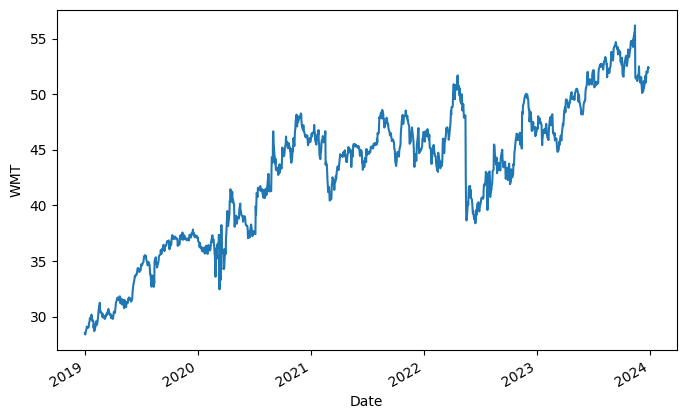

In [3791]:
fig = plt.figure(figsize=(8,5))
ax0 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
stock['Adj Close'].plot(ax=ax0)

In [3792]:
stock_daily_signal=pd.DataFrame(index=stock.index)
stock_daily_signal["Price"]=stock["Adj Close"]

In [3793]:
stock_daily_signal["daily_diff"]=stock_daily_signal["Price"].diff()

In [3794]:
stock_daily_signal

,Price,daily_diff
Date,,
2019-01-02,28.534632,NaN
2019-01-03,28.387890,-0.146742
2019-01-04,28.565205,0.177315
2019-01-07,28.901482,0.336277
2019-01-08,29.103245,0.201763
...,...,...
2023-12-22,52.039433,0.614578
2023-12-26,51.959702,-0.079731
2023-12-27,52.448040,0.488338


In [3795]:
stock_daily_signal["signal"]=np.where(stock_daily_signal["daily_diff"]>0,1,0)

In [3796]:
stock_daily_signal

,Price,daily_diff,signal
Date,,,
2019-01-02,28.534632,NaN,0
2019-01-03,28.387890,-0.146742,0
2019-01-04,28.565205,0.177315,1
2019-01-07,28.901482,0.336277,1
2019-01-08,29.103245,0.201763,1
...,...,...,...
2023-12-22,52.039433,0.614578,1
2023-12-26,51.959702,-0.079731,0
2023-12-27,52.448040,0.488338,1


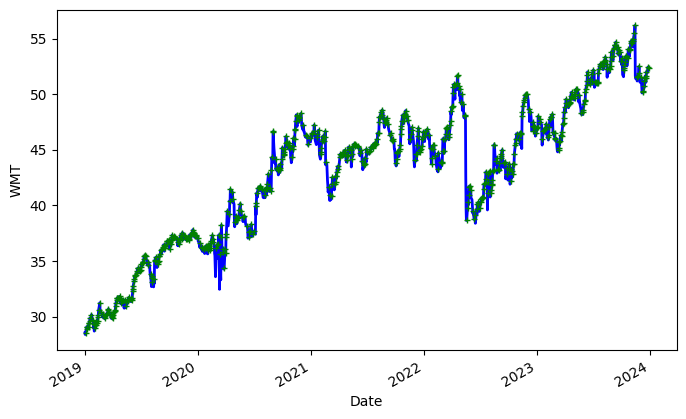

In [3797]:
fig = plt.figure(figsize=(8,5))

ax0 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
stock_daily_signal['Price'].plot(ax=ax0, color='b', lw=2.)

ax0.plot(stock_daily_signal.loc[stock_daily_signal.signal == 1.0].index,
         stock_daily_signal.Price[stock_daily_signal.signal == 1.0], '+', markersize=5, color='g')


In [3798]:
import statsmodels.api as sm
sm.tsa.acf(stock_daily_signal['Price'],nlags=10)

array([1.        , 0.99298702, 0.98629328, 0.97951037, 0.97296011,
       0.96692075, 0.96095268, 0.955349  , 0.94948145, 0.94426534,
       0.93854496])

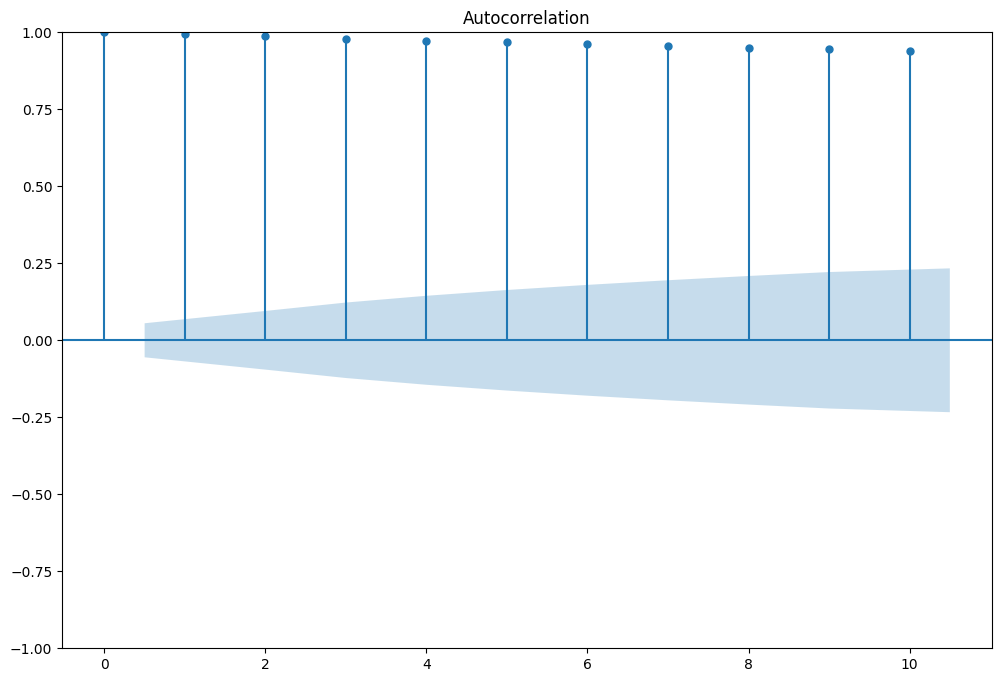

In [3799]:
# there is strong series autocorrelation.
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(stock_daily_signal['Price'],lags=10)
plt.show()

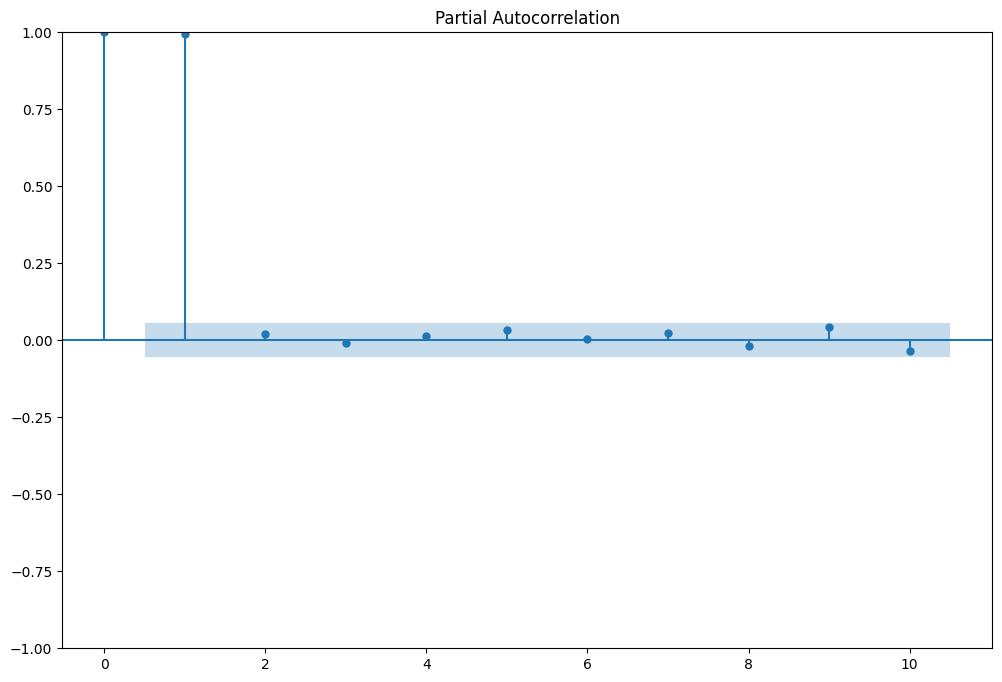

In [3800]:
#plot partial autocorrelation function
fig = tsaplots.plot_pacf(stock_daily_signal['Price'],lags=10)
plt.show()

In [3801]:
stock_daily_signal["Positions"]=stock_daily_signal["signal"].diff()

In [3802]:
stock_daily_signal

,Price,daily_diff,signal,Positions
Date,,,,
2019-01-02,28.534632,NaN,0,NaN
2019-01-03,28.387890,-0.146742,0,0.0
2019-01-04,28.565205,0.177315,1,1.0
2019-01-07,28.901482,0.336277,1,0.0
2019-01-08,29.103245,0.201763,1,0.0
...,...,...,...,...
2023-12-22,52.039433,0.614578,1,0.0
2023-12-26,51.959702,-0.079731,0,-1.0
2023-12-27,52.448040,0.488338,1,1.0


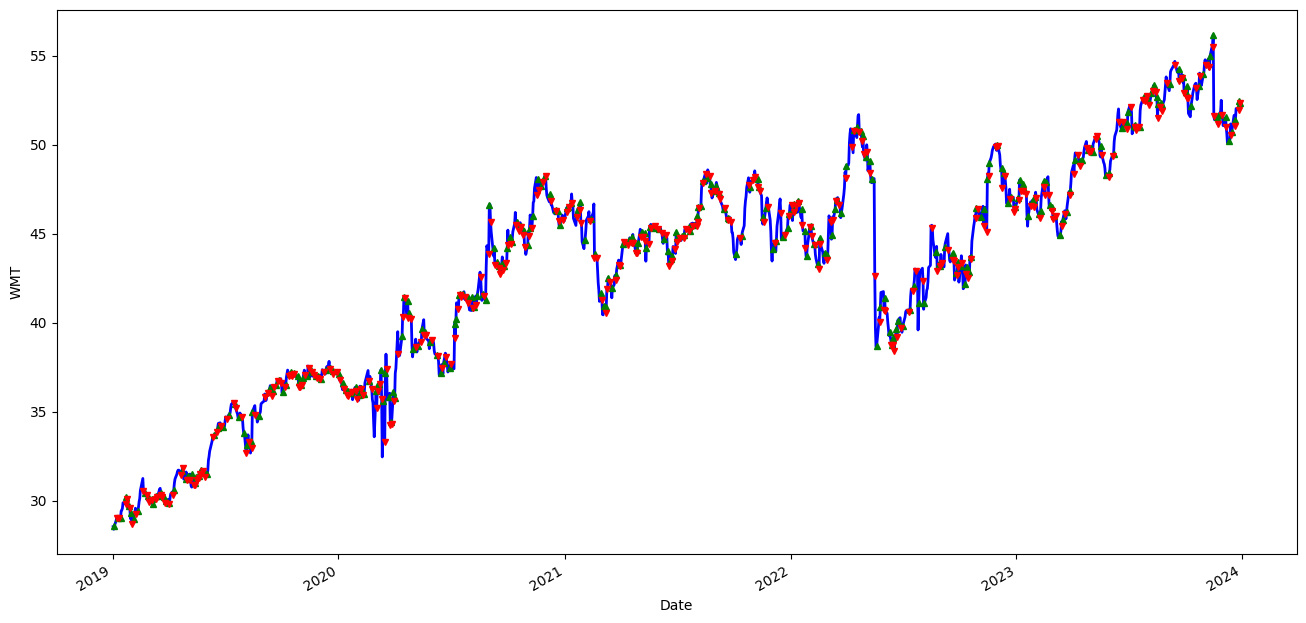

In [3803]:
fig = plt.figure(figsize=(16,8))

ax0 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
stock_daily_signal['Price'].plot(ax=ax0, color='b', lw=2.)
#when buying
ax0.plot(stock_daily_signal.loc[stock_daily_signal.Positions == 1.0].index,
         stock_daily_signal.Price[stock_daily_signal.Positions == 1.0], '^', markersize=5, color='g')
ax0.plot(stock_daily_signal.loc[stock_daily_signal.Positions == -1.0].index,
         stock_daily_signal.Price[stock_daily_signal.Positions == -1.0], 'v', markersize=5, color='r')


In [3804]:
#Backtesting
#PnL: initially we invest $1000
initial_capital= float(1000.0)

positions = pd.DataFrame(index=stock_daily_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=stock_daily_signal.index).fillna(0.0)

positions['stock'] = stock_daily_signal['signal']
portfolio['positions'] = (positions.multiply(stock_daily_signal['Price'], axis=0))

portfolio.head(10)

,positions
Date,
2019-01-02,0.000000
2019-01-03,0.000000
2019-01-04,28.565205
2019-01-07,28.901482
2019-01-08,29.103245
2019-01-09,0.000000
2019-01-10,29.029877
2019-01-11,0.000000
2019-01-14,29.026823


In [3805]:
portfolio['cash'] = initial_capital - (positions.diff().multiply(stock_daily_signal['Price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

portfolio.head(5)

,positions,cash,total
Date,,,
2019-01-02,0.000000,NaN,NaN
2019-01-03,0.000000,1000.000000,1000.000000
2019-01-04,28.565205,971.434795,1000.000000
2019-01-07,28.901482,971.434795,1000.336277
2019-01-08,29.103245,971.434795,1000.538040


<Axes: xlabel='Date'>

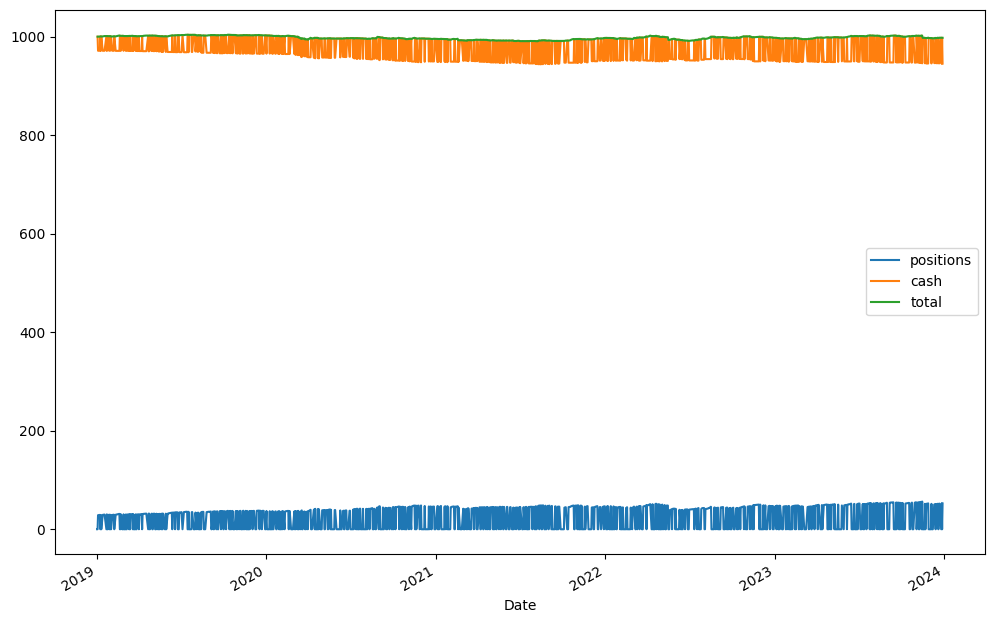

In [3806]:
portfolio.plot()

In [3807]:
portfolio.total[-1]

997.7382659912109

In [3808]:
result.append(portfolio.total[-1])

# Support and Resistance

In [3809]:
stock_daily=stock.copy()

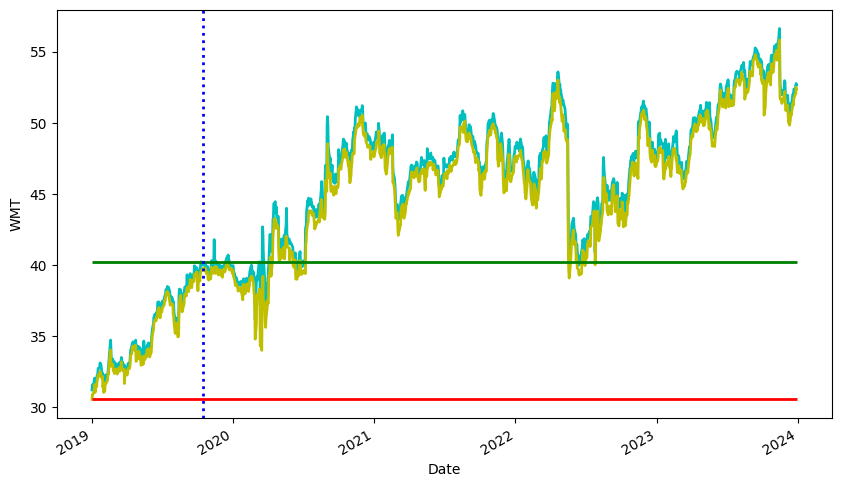

In [3810]:
lows=stock_daily['Low']
highs=stock_daily['High']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
highs.plot(ax=ax1, color='c', lw=2.)
lows.plot(ax=ax1, color='y', lw=2.)
plt.hlines(highs.head(200).max(),lows.index.values[0],lows.index.values[-1] ,linewidth=2, color='g')
plt.hlines(lows.head(200).min(),lows.index.values[0],lows.index.values[-1], linewidth=2, color='r')
plt.axvline(linewidth=2,color='b',x=lows.index.values[200],linestyle=':')
plt.show()

In [3811]:
highs.head(200).max()

40.23666763305664

In [3812]:
stock_signal=pd.DataFrame(index=stock_daily.index)
stock_signal["price"]=stock["Adj Close"]
def trading_support_resistance(data, bin_width=20):   #By default we check for 20 days interval
    data['sup_tolerance'] = pd.Series(np.zeros(len(data)))
    data['res_tolerance'] = pd.Series(np.zeros(len(data)))
    data['sup_count'] = pd.Series(np.zeros(len(data)))
    data['res_count'] = pd.Series(np.zeros(len(data)))
    data['sup'] = pd.Series(np.zeros(len(data)))
    data['res'] = pd.Series(np.zeros(len(data)))
    data['positions'] = pd.Series(np.zeros(len(data)))
    data['signal'] = pd.Series(np.zeros(len(data)))

    in_support=0
    in_resistance=0

    for x in range(bin_width, len(data)):
        data_section = data[x - bin_width:x + 1]
        support_level=min(data_section['price'])
        resistance_level=max(data_section['price'])
        range_level=resistance_level-support_level
        data['res'][x]=resistance_level
        data['sup'][x]=support_level
        data['sup_tolerance'][x]=support_level + 0.2 * range_level
        data['res_tolerance'][x]=resistance_level - 0.2 * range_level
        if data['price'][x]>=data['res_tolerance'][x] and data['price'][x] <= data['res'][x]:
            in_resistance+=1
            data['res_count'][x]=in_resistance
        elif data['price'][x] <= data['sup_tolerance'][x] and data['price'][x] >= data['sup'][x]:
            in_support += 1
            data['sup_count'][x] = in_support
        else:
            in_support=0
            in_resistance=0
        if in_resistance>2:           #if reached twice
            data['signal'][x]=1
        elif in_support>2:
            data['signal'][x]=0
        else:
            data['signal'][x] = data['signal'][x-1]
    data['positions']=data['signal'].diff()

In [3813]:
trading_support_resistance(stock_signal)
stock_signal.tail(30)

,price,sup_tolerance,res_tolerance,sup_count,res_count,sup,res,positions,signal
Date,,,,,,,,,
2023-11-16,51.644978,52.554490,55.283027,1.0,NaN,51.644978,56.192539,0.0,1.0
2023-11-17,51.416603,52.371790,55.237352,2.0,NaN,51.416603,56.192539,0.0,1.0
2023-11-20,51.400055,52.358552,55.234042,3.0,NaN,51.400055,56.192539,0.0,1.0
2023-11-21,51.585403,52.358552,55.234042,4.0,NaN,51.400055,56.192539,0.0,1.0
2023-11-22,51.191544,52.191743,55.192340,5.0,NaN,51.191544,56.192539,0.0,1.0
2023-11-24,51.651596,52.191743,55.192340,6.0,NaN,51.191544,56.192539,0.0,1.0
2023-11-27,51.886585,52.191743,55.192340,7.0,NaN,51.191544,56.192539,0.0,1.0
2023-11-28,52.505505,52.191743,55.192340,NaN,NaN,51.191544,56.192539,0.0,1.0
2023-11-29,51.658218,52.191743,55.192340,1.0,NaN,51.191544,56.192539,0.0,1.0


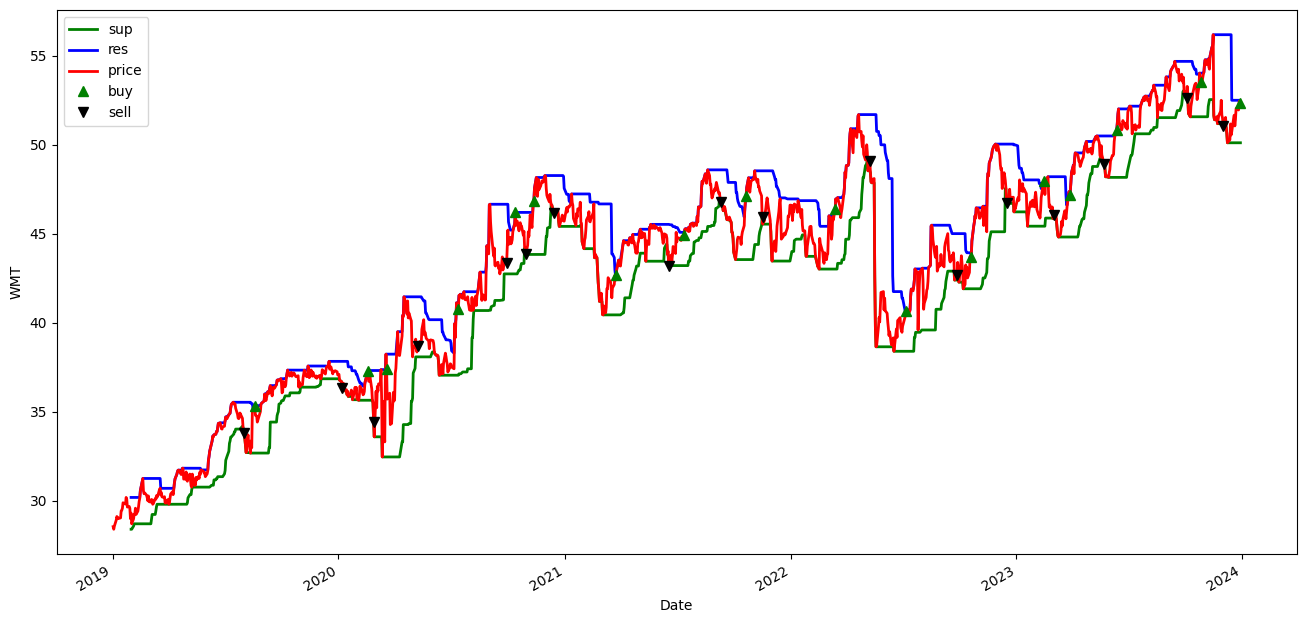

In [3814]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
stock_signal['sup'].plot(ax=ax1, color='g', lw=2.)
stock_signal['res'].plot(ax=ax1, color='b', lw=2.)
stock_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(stock_signal.loc[stock_signal.positions == 1.0].index,
stock_signal.price[stock_signal.positions == 1.0],'^', markersize=7, color='g',label='buy')
ax1.plot(stock_signal.loc[stock_signal.positions == -1.0].index,
         stock_signal.price[stock_signal.positions == -1.0], 'v', markersize=7, color='k',label='sell')
plt.legend()
plt.show()

## Back Testing the above strategy

In [3815]:
#positions

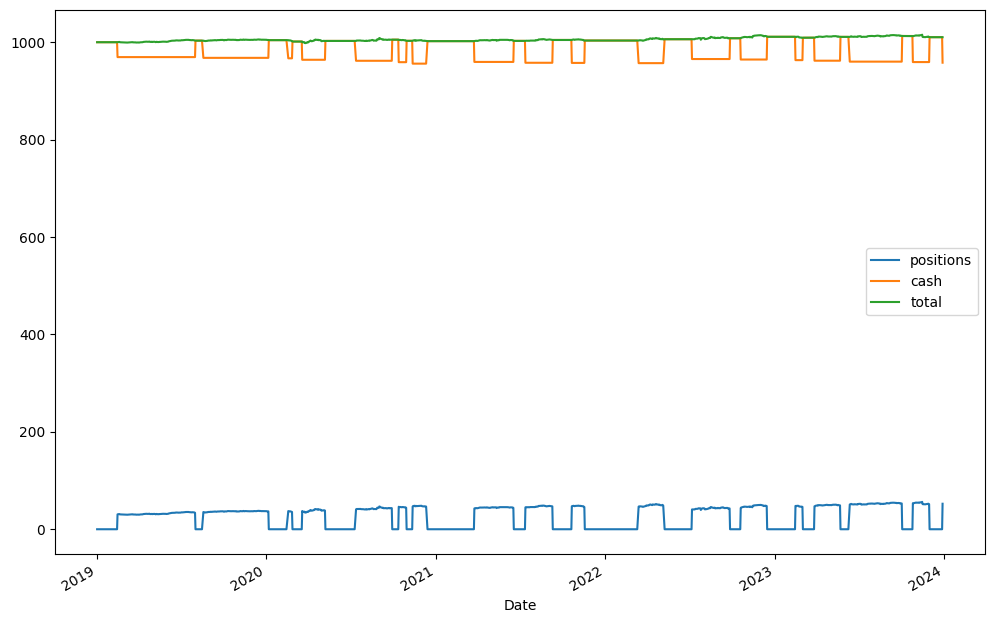

In [3816]:
#PnL: initially we invest $1000
initial_capital= float(1000.0)

positions = pd.DataFrame(index=stock_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=stock_signal.index).fillna(0.0)
positions['stock'] = stock_signal['signal']
positions.fillna(0,inplace=True)
portfolio['positions'] = (positions.multiply(stock_signal['price'], axis=0))

portfolio['cash'] = initial_capital - (positions.diff().fillna(positions["stock"][0]).multiply(stock_daily_signal['Price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
portfolio.plot()
plt.show()

In [3817]:
portfolio.total[-1]

1010.324577331543

In [3818]:
result.append(portfolio.total[-1])



## Dual Moving Average Crossover

In [3819]:
data=pd.DataFrame(index=stock_daily.index)
data["Price"]=stock_daily['Adj Close']

In [3820]:
data

,Price
Date,
2019-01-02,28.534632
2019-01-03,28.387890
2019-01-04,28.565205
2019-01-07,28.901482
2019-01-08,29.103245
...,...
2023-12-22,52.039433
2023-12-26,51.959702
2023-12-27,52.448040


#### The idea of the strategy is the following. Calculate a shorter SMA1, say for 20 days, and a longer SMA2, say for 50 days. Whenever SMA1 is above SMA2, go long on the financial instrument. Whenever SMA1 is below SMA2, go short on the financial instrument. Because the example is based on EUR/USD, going long or short is easily accomplished.

In [3821]:
data['SMA1'] = data["Price"].rolling(10).mean()

In [3822]:
data['SMA2'] = data["Price"].rolling(40).mean()

<Axes: xlabel='Date'>

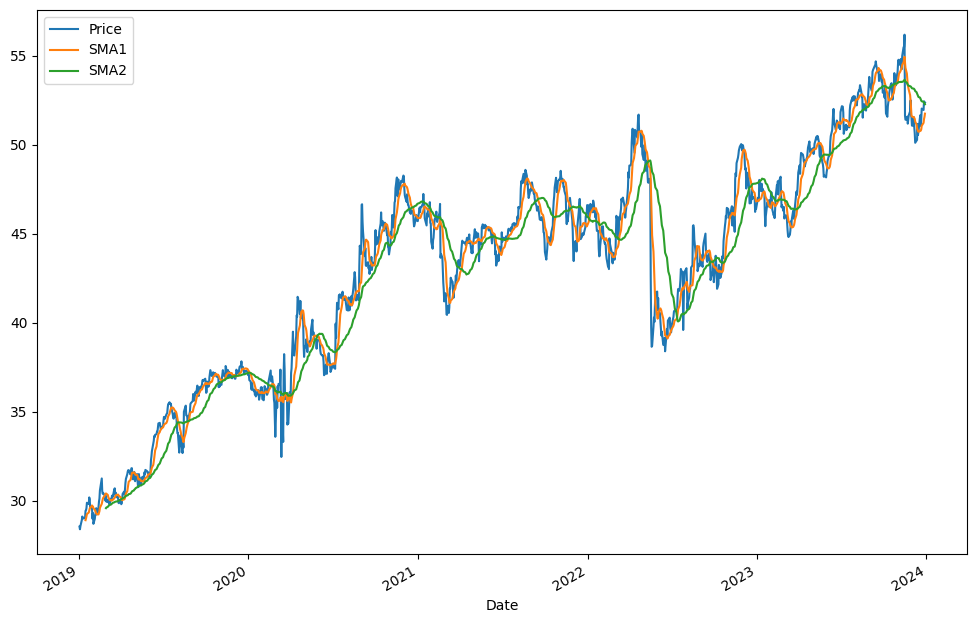

In [3823]:
data.plot()

In [3824]:
data.dropna(inplace=True)

In [3825]:
data["signal"]=np.where(data["SMA1"]>data["SMA2"],1,0)

In [3826]:
data

,Price,SMA1,SMA2,signal
Date,,,,
2019-02-28,30.261871,30.400664,29.574951,1
2019-03-01,29.937830,30.382628,29.610031,1
2019-03-04,29.913374,30.317207,29.648168,1
2019-03-05,30.063158,30.199205,29.685617,1
2019-03-06,30.038715,30.149681,29.714048,1
...,...,...,...,...
2023-12-22,52.039433,51.066743,52.450446,0
2023-12-26,51.959702,51.238492,52.415867,0
2023-12-27,52.448040,51.455087,52.378189,0


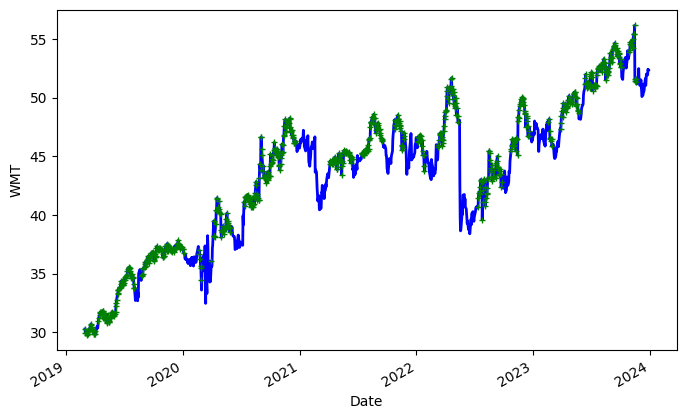

In [3827]:
fig = plt.figure(figsize=(8,5))

ax0 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
data['Price'].plot(ax=ax0, color='b', lw=2.)

ax0.plot(data.loc[data.signal == 1.0].index,
         data.Price[data.signal == 1.0], '+', markersize=5, color='g')

In [3828]:
data["Positions"]=data["signal"].diff()

In [3829]:
data.Positions.value_counts()

Positions
 0.0    1181
-1.0      19
 1.0      18
Name: count, dtype: int64

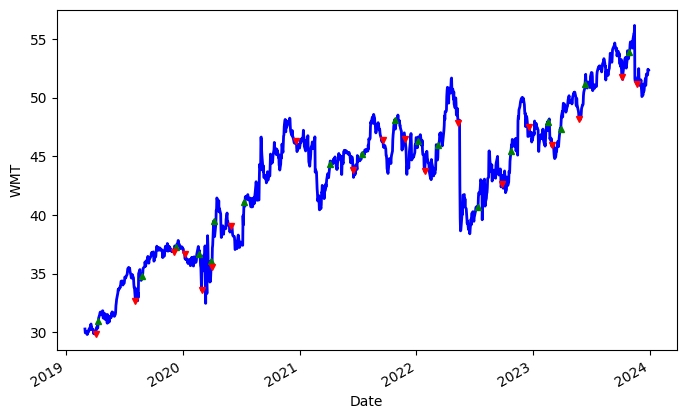

In [3830]:
fig = plt.figure(figsize=(8,5))

ax0 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
data['Price'].plot(ax=ax0, color='b', lw=2.)
#when buying
ax0.plot(data.loc[data.Positions == 1.0].index,
         data.Price[data.Positions == 1.0], '^', markersize=5, color='g')
ax0.plot(data.loc[data.Positions == -1.0].index,
        data.Price[data.Positions == -1.0], 'v', markersize=5, color='r')


In [3831]:
#Backtesting
#PnL: initially we invest $1000
initial_capital= float(1000.0)

positions = pd.DataFrame(index=data.index).fillna(0.0)
portfolio = pd.DataFrame(index=data.index).fillna(0.0)

positions['stock'] = data['signal']
positions.fillna(0,inplace=True)
portfolio['positions'] = (positions.multiply(data['Price'], axis=0))

portfolio.head(10)

,positions
Date,
2019-02-28,30.261871
2019-03-01,29.937830
2019-03-04,29.913374
2019-03-05,30.063158
2019-03-06,30.038715
2019-03-07,29.791084
2019-03-08,29.833879
2019-03-11,30.105963
2019-03-12,30.072336


In [3832]:
portfolio['cash'] = initial_capital - (positions.diff().fillna(positions["stock"][0]).multiply(stock_daily_signal['Price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

portfolio.head(5)

,positions,cash,total
Date,,,
2019-02-28,30.261871,969.738129,1000.000000
2019-03-01,29.937830,969.738129,999.675959
2019-03-04,29.913374,969.738129,999.651503
2019-03-05,30.063158,969.738129,999.801287
2019-03-06,30.038715,969.738129,999.776844


<Axes: xlabel='Date'>

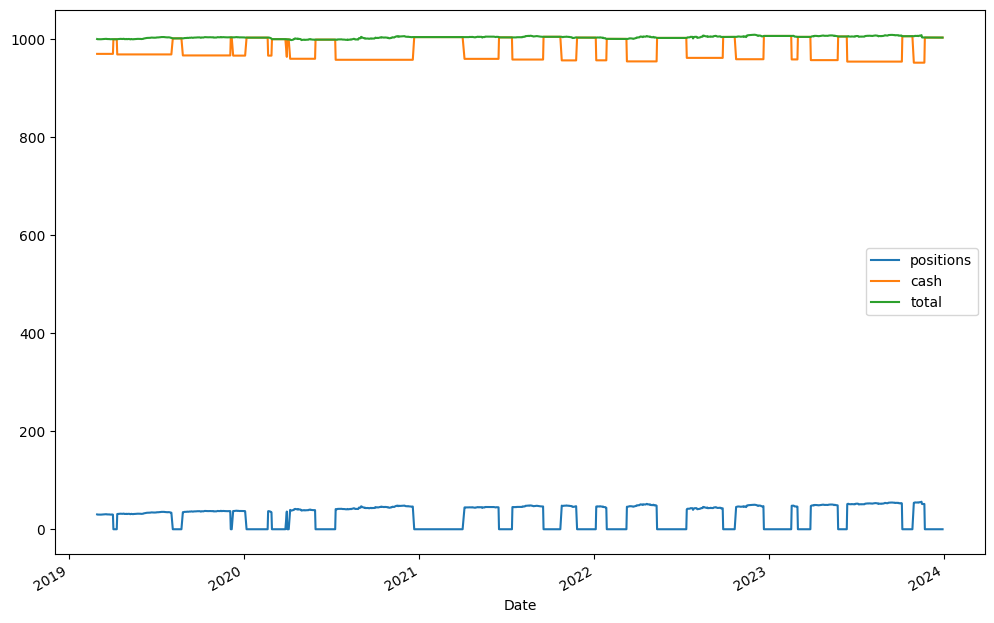

In [3833]:
portfolio.plot()

In [3834]:
portfolio["total"][-1]

1002.9756908416748

In [3835]:
result.append(portfolio.total[-1])

# Absolute price oscillator

In [3836]:
stock_daily=stock.copy()

In [3837]:
num_of_periods_fast=10
num_of_periods_slow=40
ema_fast=0
ema_fast_values=[]

lam_fast=2.0/(num_of_periods_fast+1)
lam_slow=2.0/(num_of_periods_slow+1)
ema_slow=0
ema_slow_values=[]

apo_values=[]

close=stock['Adj Close'] # use adjusted close for closing price
for close_price in close:
    if (ema_fast == 0): # first observation
        ema_fast = close_price
        ema_slow = close_price
    else:
        ema_fast = lam_fast*close_price+(1-lam_fast)*ema_fast
        ema_slow = lam_slow*close_price+(1-lam_slow)*ema_slow
    ema_fast_values.append(ema_fast)
    ema_slow_values.append(ema_slow)
    apo_values.append(ema_fast - ema_slow)

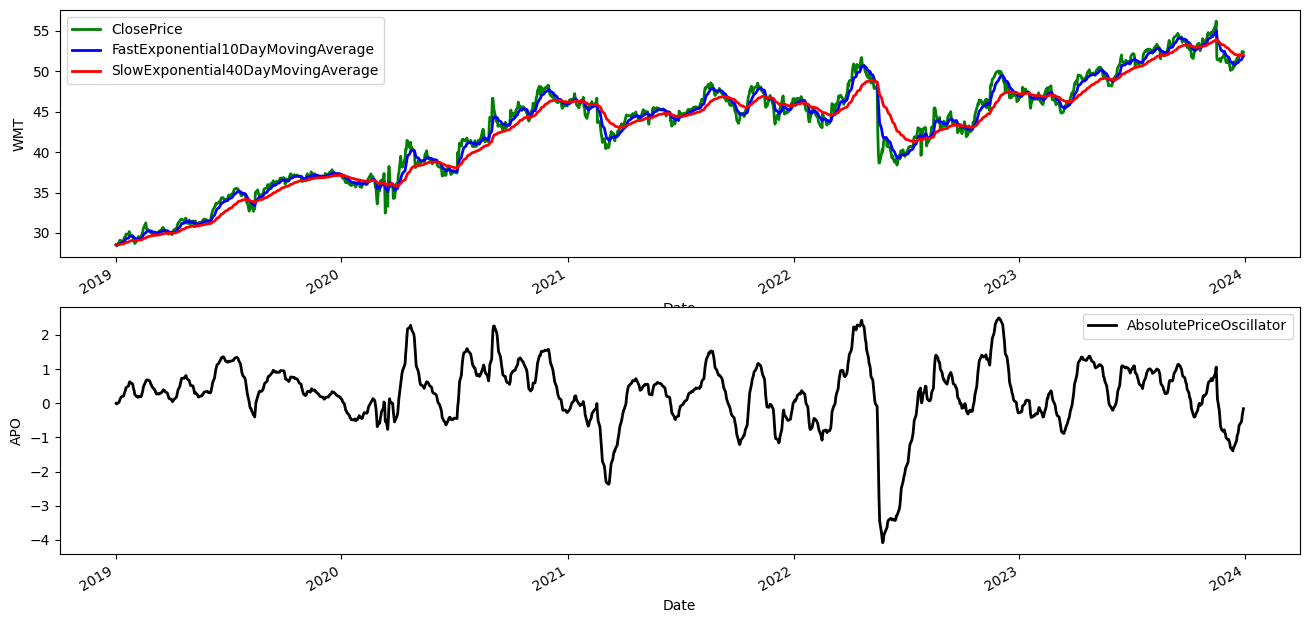

In [3838]:
#PLot
stock_daily = stock_daily.assign(ClosePrice=pd.Series(close,index=stock_daily.index))
stock_daily = stock_daily.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=stock_daily.index))
stock_daily = stock_daily.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=stock_daily.index))
stock_daily = stock_daily.assign(AbsolutePriceOscillator=pd.Series(apo_values, index=stock_daily.index))

close_price = stock_daily['ClosePrice']
ema_f = stock_daily['FastExponential10DayMovingAverage']
ema_s = stock_daily['SlowExponential40DayMovingAverage']
apo = stock_daily['AbsolutePriceOscillator']

fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(211, ylabel=yf.Ticker(val).info["symbol"])
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='black', lw=2., legend=True)
plt.show()

## Back Testing Strategy

In [3839]:
stock_daily["signal"]=np.where(stock_daily["AbsolutePriceOscillator"]>0,1,0)

In [3840]:
stock_daily.head(10)

,Open,High,Low,Close,Adj Close,Volume,ClosePrice,FastExponential10DayMovingAverage,SlowExponential40DayMovingAverage,AbsolutePriceOscillator,signal
Date,,,,,,,,,,,
2019-01-02,30.546667,31.216667,30.546667,31.113333,28.534632,24458100,28.534632,28.534632,28.534632,0.000000,0
2019-01-03,31.070000,31.570000,30.900000,30.953333,28.387890,24831900,28.387890,28.507951,28.527474,-0.019522,0
2019-01-04,31.070000,31.219999,30.896667,31.146667,28.565205,24087300,28.565205,28.518361,28.529314,-0.010953,0
2019-01-07,31.206667,31.723333,31.059999,31.513332,28.901482,23369100,28.901482,28.588019,28.547469,0.040551,1
2019-01-08,31.686666,31.920000,31.303333,31.733334,29.103245,21602700,29.103245,28.681697,28.574580,0.107117,1
2019-01-09,31.903334,32.046665,31.590000,31.629999,29.008476,18816900,29.008476,28.741111,28.595745,0.145366,1
2019-01-10,31.293333,31.660000,31.040001,31.653334,29.029877,28188900,29.029877,28.793614,28.616922,0.176691,1
2019-01-11,31.663334,31.763332,31.516666,31.613333,28.993189,16183800,28.993189,28.829900,28.635277,0.194623,1
2019-01-14,31.493334,31.816668,31.426666,31.650000,29.026823,21255300,29.026823,28.865704,28.654377,0.211328,1


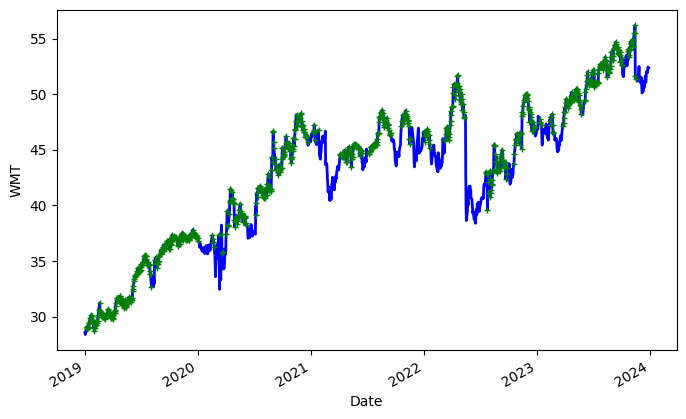

In [3841]:
fig = plt.figure(figsize=(8,5))

ax0 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
stock_daily['Adj Close'].plot(ax=ax0, color='b', lw=2.)

ax0.plot(stock_daily.loc[stock_daily.signal == 1.0].index,
         stock_daily["Adj Close"][stock_daily.signal == 1.0], '+', markersize=5, color='g')

In [3842]:
stock_daily["Positions"]=stock_daily["signal"].diff()

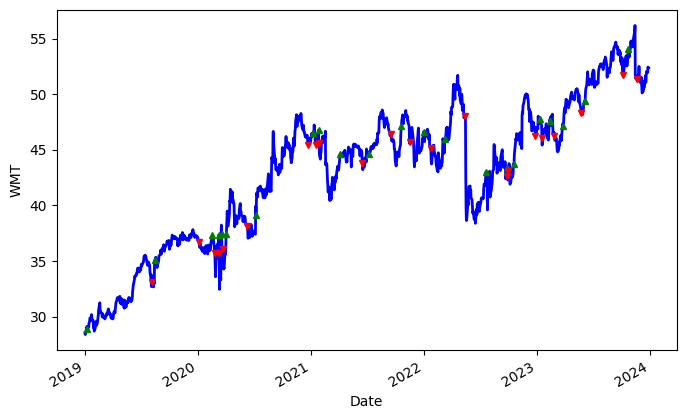

In [3843]:
fig = plt.figure(figsize=(8,5))

ax0 = fig.add_subplot(111, ylabel=yf.Ticker(val).info["symbol"])
stock_daily['Adj Close'].plot(ax=ax0, color='b', lw=2.)
#when buying
ax0.plot(stock_daily.loc[stock_daily.Positions == 1.0].index,
         stock_daily["Adj Close"][stock_daily.Positions == 1.0], '^', markersize=5, color='g')
ax0.plot(stock_daily.loc[stock_daily.Positions == -1.0].index,
        stock_daily["Adj Close"][stock_daily.Positions == -1.0], 'v', markersize=5, color='r')

In [3844]:
#Backtesting
#PnL: initially we invest $1000
initial_capital= float(1000.0)

positions = pd.DataFrame(index=data.index).fillna(0.0)
portfolio = pd.DataFrame(index=data.index).fillna(0.0)

positions['stock'] = stock_daily['signal']
positions.fillna(0,inplace=True)
portfolio['positions'] = (positions.multiply(stock_daily['Adj Close'], axis=0))

portfolio.head(10)

,positions
Date,
2019-02-28,30.261871
2019-03-01,29.937830
2019-03-04,29.913374
2019-03-05,30.063158
2019-03-06,30.038715
2019-03-07,29.791084
2019-03-08,29.833879
2019-03-11,30.105963
2019-03-12,30.072336


In [3845]:
portfolio['cash'] = initial_capital - (positions.diff().fillna(positions["stock"][0]).multiply(stock_daily_signal['Price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']

portfolio.head(5)

,positions,cash,total
Date,,,
2019-02-28,30.261871,969.738129,1000.000000
2019-03-01,29.937830,969.738129,999.675959
2019-03-04,29.913374,969.738129,999.651503
2019-03-05,30.063158,969.738129,999.801287
2019-03-06,30.038715,969.738129,999.776844


<Axes: xlabel='Date'>

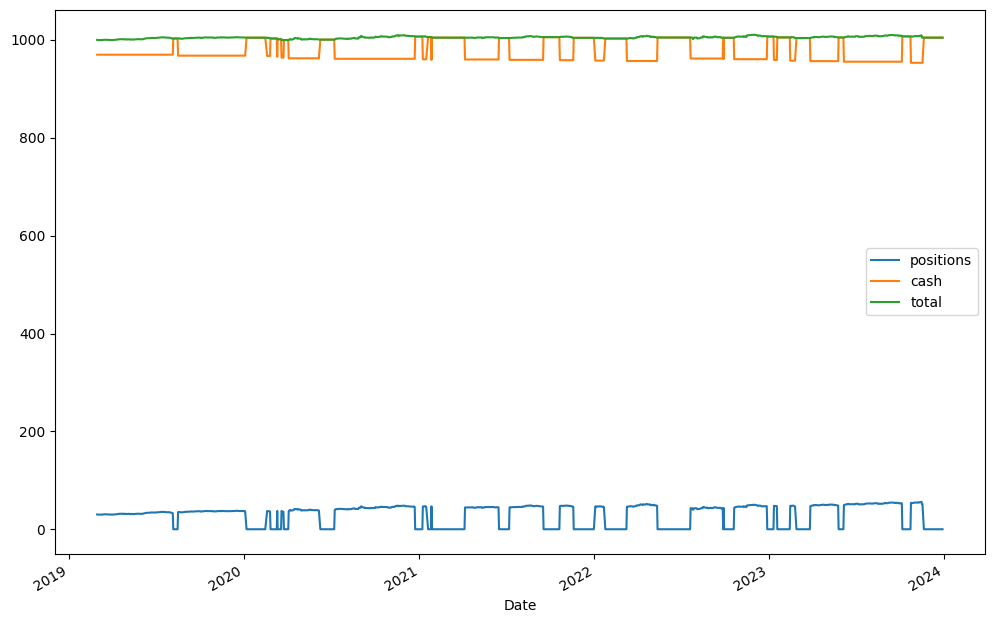

In [3846]:
portfolio.plot()

In [3847]:
portfolio["total"][-1]

1004.5830612182617

In [3848]:
result.append(portfolio.total[-1])

In [3849]:
Results["Return"]=result

In [3850]:
np.round(Results,2)

,Return
momentum,997.74
Support and Resistance,1010.32
Dual Moving Average Crossover,1002.98
Absolute Price Oscillator,1004.58


## Pair Trading

In [3851]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)
%matplotlib inline

import seaborn

try:
    import statsmodels
    print("module 'statsmodels' is installed")
except ModuleNotFoundError:
    print("module 'statsmodels' is not installed")
    !pip install statsmodels
from statsmodels.tsa.stattools import coint

try:
    import yfinance
    print("module 'yfinance' is installed")
except ModuleNotFoundError:
    print("module 'yfinance' is not installed")
    !pip install yfinance

import yfinance as yf

tickers = list
start_date='2010-01-01'
end_date = '2023-12-31'

data=yf.download(tickers,start_date, end_date)['Adj Close'].dropna()

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:   #we choose p-value level at 2%
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs


[                       0%%                      ]

module 'statsmodels' is installed
module 'yfinance' is installed


[*********************100%%**********************]  14 of 14 completed


In [3852]:
data

Ticker,AAPL,BRK-B,CAT,CVX,GE,GOOG,MSFT,NVDA,SNOW,TSLA,UBER,WMT,XOM,^GSPC
Date,,,,,,,,,,,,,,
2020-09-16,109.854095,219.589996,140.207275,67.585228,33.097980,76.044998,198.798141,124.820854,253.929993,147.253326,37.660000,43.051270,32.051140,3385.489990
2020-09-17,108.100441,218.050003,142.768112,67.783096,34.568993,74.776497,196.723404,124.312172,227.539993,141.143326,37.060001,43.187122,32.042667,3357.010010
2020-09-18,104.671471,218.210007,141.394897,67.284126,33.735416,72.999496,194.280228,121.576767,240.000000,147.383331,37.119999,42.744804,31.525566,3319.469971
2020-09-21,107.845711,213.020004,134.844284,65.640938,31.136614,71.557999,196.364624,124.848267,228.850006,149.796661,36.490002,43.307190,30.881329,3281.060059
2020-09-22,109.540596,214.160004,136.532974,64.978531,30.646273,73.273003,201.095886,126.050163,235.160004,141.410004,34.400002,43.698975,30.118404,3315.570068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.353287,356.470001,289.020966,149.419571,101.029831,142.720001,373.888580,488.277069,195.669998,252.539993,61.709999,52.039433,100.971611,4754.629883
2023-12-26,192.803986,356.829987,294.266693,150.764893,101.651840,142.820007,373.968445,492.766907,198.559998,256.609985,61.980000,51.959702,101.199486,4774.750000
2023-12-27,192.903839,356.950012,296.745209,150.270294,102.314445,141.440002,373.379547,494.146820,198.710007,261.440002,63.279999,52.448040,100.723907,4781.580078


In [3853]:
data=data.loc[:,tickers]

[]


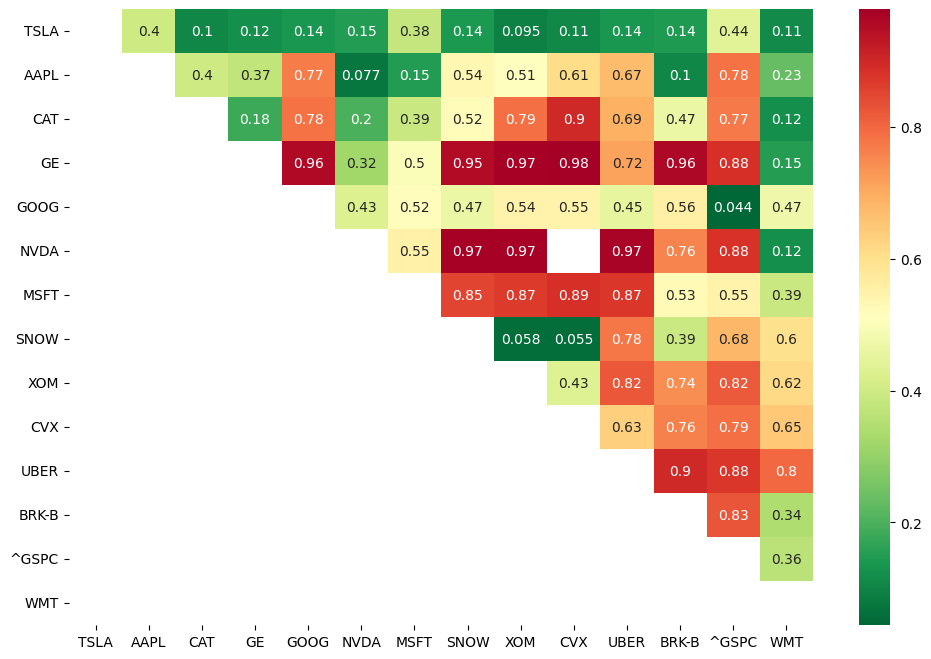

In [3854]:
pvalues, pairs = find_cointegrated_pairs(data)
print(pairs)

sns_plot=seaborn.heatmap(pvalues, xticklabels=data.keys(),
                yticklabels=tickers, cmap='RdYlGn_r',annot=True,
                   mask = (pvalues >= 0.98))
fig=sns_plot.get_figure()
#fig.savefig('correlation.jpg')
plt.show()

## Lets Check for GE and CVX

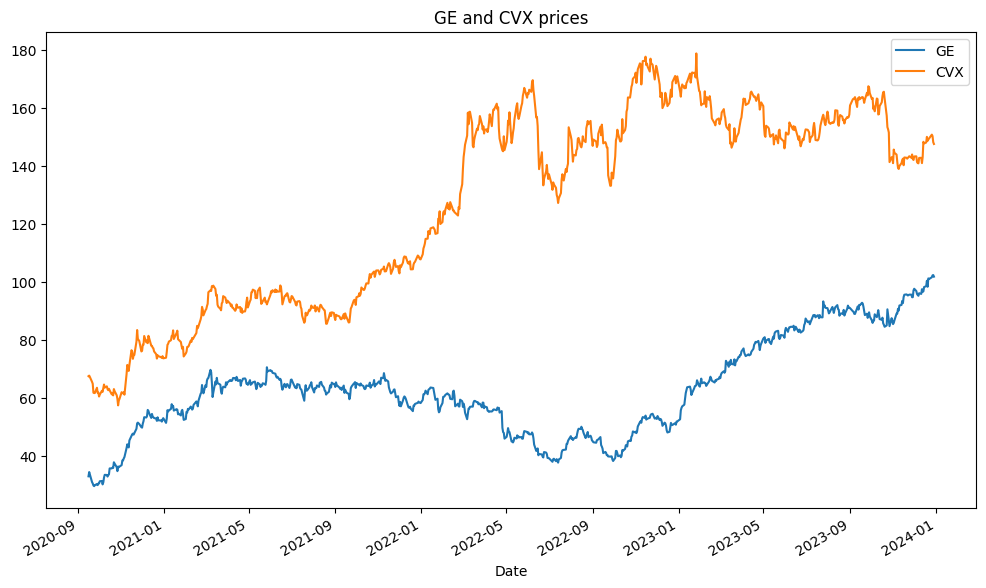

In [3855]:
Symbol1_prices = data['GE']
Symbol2_prices = data['CVX']
plt.title(Symbol1_prices.name+" and "+Symbol2_prices.name+" prices")
Symbol1_prices.plot(figsize=(12,7))
Symbol2_prices.plot()
plt.legend()
#plt.savefig('MSFT+ADBE.jpg')
plt.show()


0.9789308038559482


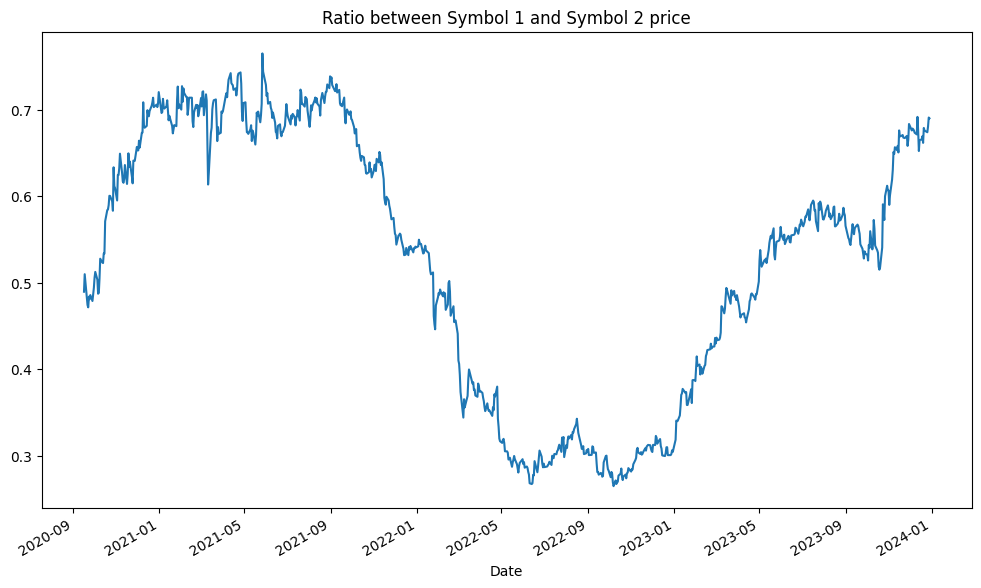

In [3856]:
# Z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

score, pvalue, _ = coint(Symbol1_prices, Symbol2_prices)
print(pvalue)
ratios = Symbol1_prices / Symbol2_prices
plt.title("Ratio between Symbol 1 and Symbol 2 price")

ratios.plot(figsize=(12,7))
plt.show()

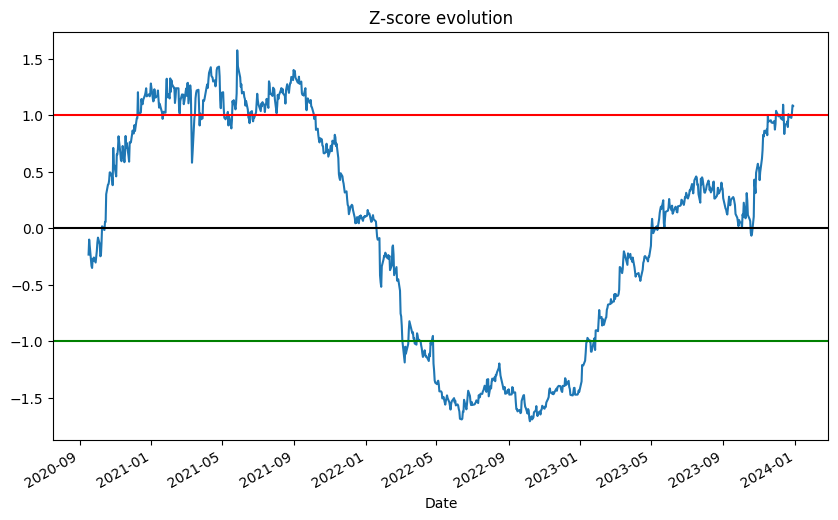

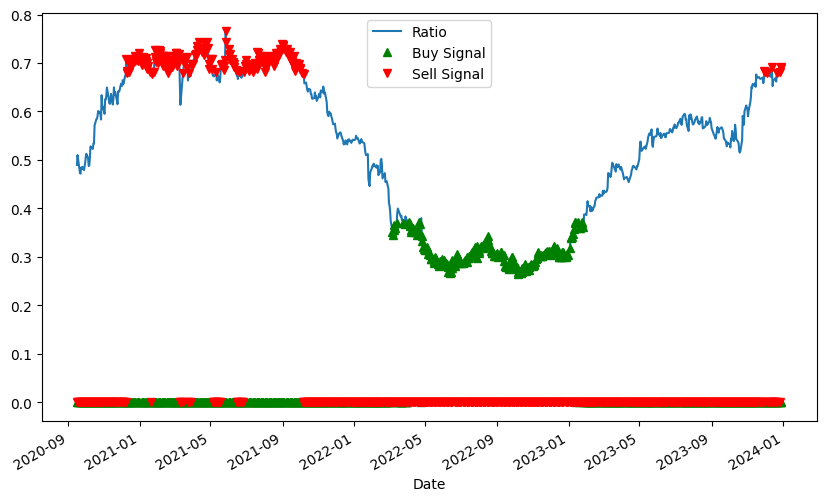

In [3857]:
#Identify Buy/Sell Signals
#Choose k=1
zscore(ratios).plot(figsize=(10,6))
plt.title("Z-score evolution")
plt.axhline(zscore(ratios).mean(),color="black")
plt.axhline(1.0, color="red")
plt.axhline(-1.0, color="green")
plt.show()

ratios.plot(figsize=(10,6))
buy = ratios.copy()
sell = ratios.copy()
buy[zscore(ratios)>-1] = 0
sell[zscore(ratios)<1] = 0
buy.plot(color="g", linestyle="None", marker="^")
sell.plot(color="r", linestyle="None", marker="v")
plt.legend(["Ratio", "Buy Signal", "Sell Signal"])
plt.show()

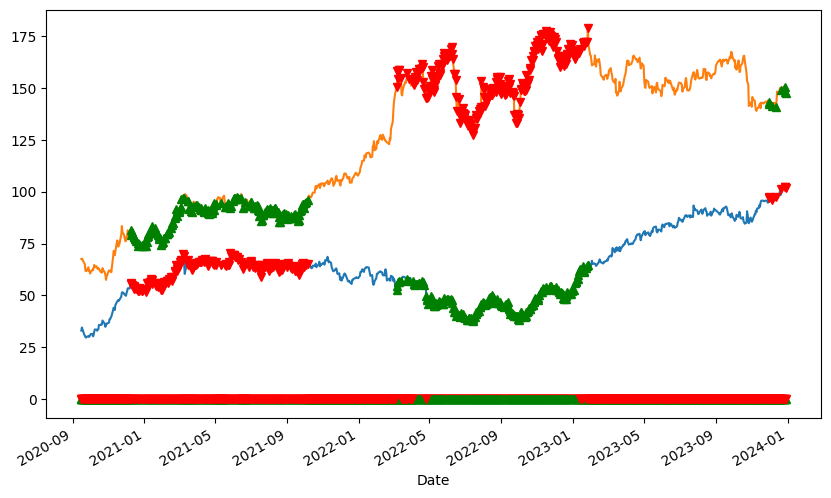

In [3858]:
symbol1_buy=Symbol1_prices.copy()
symbol1_sell=Symbol1_prices.copy()
symbol2_buy=Symbol2_prices.copy()
symbol2_sell=Symbol2_prices.copy()

Symbol1_prices.plot(figsize=(15,10))
symbol1_buy[zscore(ratios)>-1] = 0
symbol1_sell[zscore(ratios)<1] = 0
symbol1_buy.plot(color="g", linestyle="None", marker="^")
symbol1_sell.plot(color="r", linestyle="None", marker="v")

Symbol2_prices.plot(figsize=(10,6))
symbol2_buy[zscore(ratios)<1] = 0
symbol2_sell[zscore(ratios)>-1] = 0
symbol2_buy.plot(color="g", linestyle="None", marker="^")
symbol2_sell.plot(color="r", linestyle="None", marker="v")
#plt.savefig('MSFT-ADBE-buy-sell.jpg')
plt.show()

##Back Testing the startegy of Pair Trading

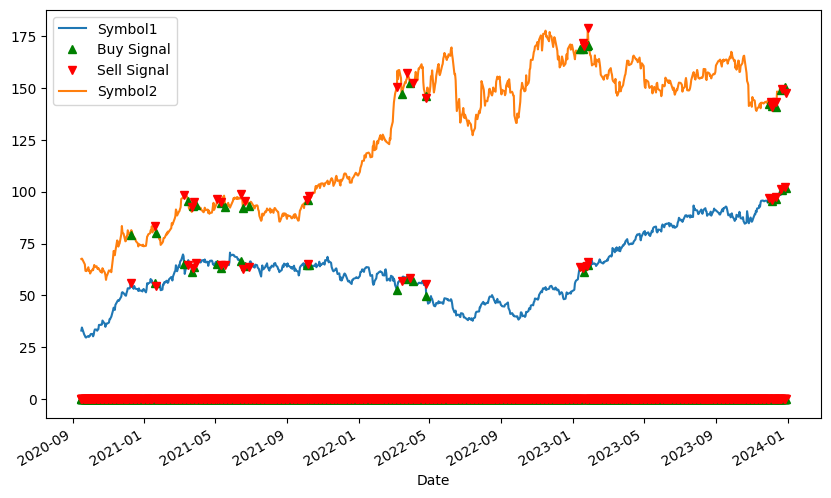

In [3859]:
pair_correlation_trading_strategy = pd.DataFrame(index=Symbol1_prices.index)
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))


position=0
for i in range(len(Symbol1_prices)):
    s1price=Symbol1_prices[i]
    s2price=Symbol2_prices[i]
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1price
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2price
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1price
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2price
        position = 0

Symbol1_prices.plot(figsize=(10,6))
pair_correlation_trading_strategy['symbol1_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol1_sell'].plot(color="r", linestyle="None", marker="v")
Symbol2_prices.plot()
pair_correlation_trading_strategy['symbol2_buy'].plot(color="g", linestyle="None", marker="^")
pair_correlation_trading_strategy['symbol2_sell'].plot(color="r", linestyle="None", marker="v")

plt.legend(["Symbol1", "Buy Signal", "Sell Signal","Symbol2"])
#plt.savefig('MSFT-ADBE-pair-strategy.jpg')
plt.show()

In [3860]:
pair_correlation_trading_strategy[:60]

,symbol1_price,symbol1_buy,symbol1_sell,symbol2_buy,symbol2_sell
Date,,,,,
2020-09-16,33.097980,0.0,0.000000,0.000000,0.0
2020-09-17,34.568993,0.0,0.000000,0.000000,0.0
2020-09-18,33.735416,0.0,0.000000,0.000000,0.0
2020-09-21,31.136614,0.0,0.000000,0.000000,0.0
2020-09-22,30.646273,0.0,0.000000,0.000000,0.0
2020-09-23,29.959797,0.0,0.000000,0.000000,0.0
2020-09-24,29.714624,0.0,0.000000,0.000000,0.0
2020-09-25,30.021872,0.0,0.000000,0.000000,0.0
2020-09-28,30.464090,0.0,0.000000,0.000000,0.0


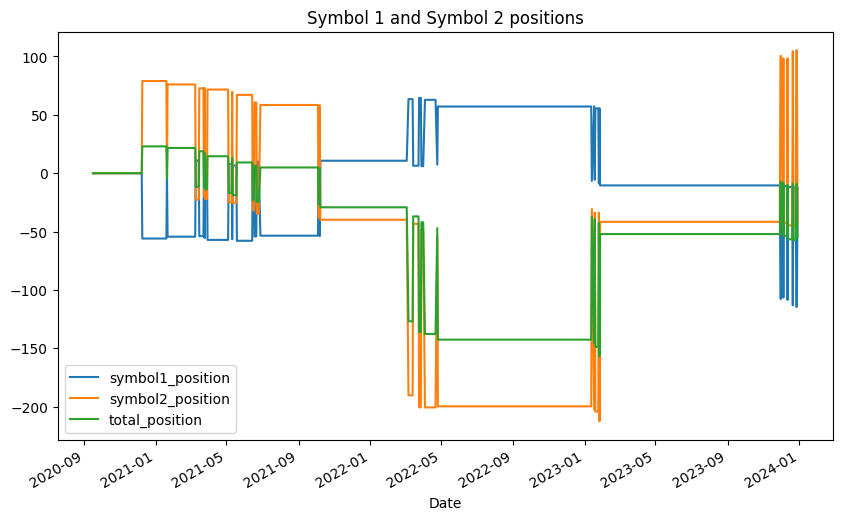

In [3861]:
#position
#assume that we only buy/sell one share, regardless of the price deifference
pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize=(15,10))
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot(figsize=(15,10))

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(10,6))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()

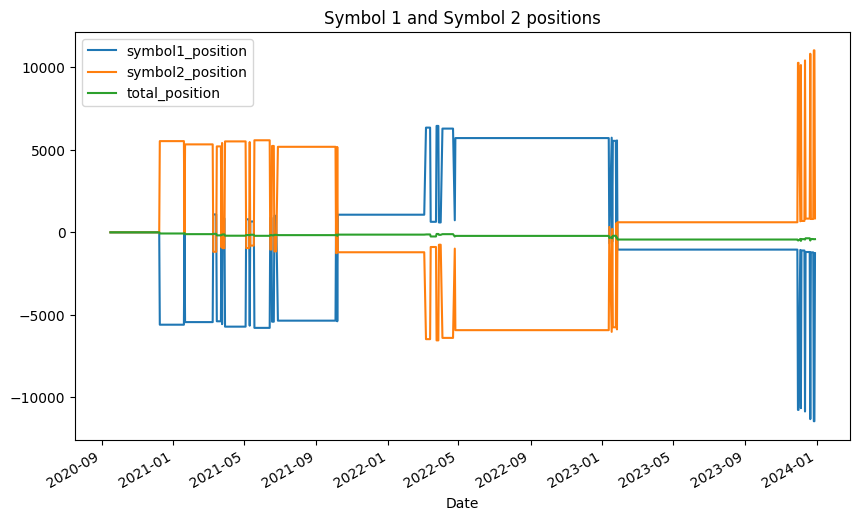

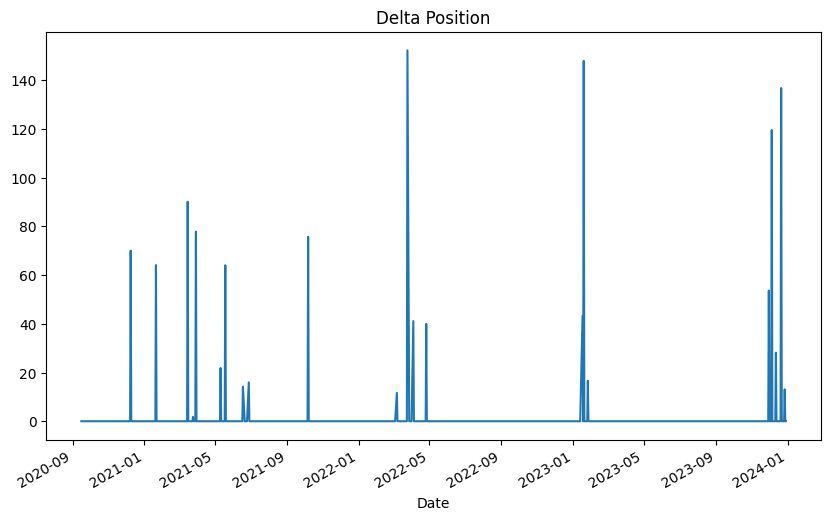

In [3862]:
pair_correlation_trading_strategy['symbol1_price']=Symbol1_prices
pair_correlation_trading_strategy['symbol1_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol1_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_buy']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['symbol2_sell']=np.zeros(len(Symbol1_prices))
pair_correlation_trading_strategy['delta']=np.zeros(len(Symbol1_prices))


position=0
s1_shares = 100
for i in range(len(Symbol1_prices)):
    s1positions= Symbol1_prices[i] * s1_shares
    s2positions= Symbol2_prices[i] * int(s1positions/Symbol2_prices[i])
    #print(Symbol1_prices[i],Symbol2_prices[i])
    delta_position=s1positions-s2positions
    if not position and symbol1_buy[i]!=0:
        pair_correlation_trading_strategy['symbol1_buy'][i]=s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i]=delta_position
        position=1
    elif not position and symbol1_sell[i]!=0:
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        pair_correlation_trading_strategy['delta'][i] = delta_position
        position = -1
    elif position==-1 and (symbol1_sell[i]==0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_buy'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_sell'][i] = s2positions
        position = 0
    elif position==1 and (symbol1_buy[i] == 0 or i==len(Symbol1_prices)-1):
        pair_correlation_trading_strategy['symbol1_sell'][i] = s1positions
        pair_correlation_trading_strategy['symbol2_buy'][i] = s2positions
        position = 0

pair_correlation_trading_strategy['symbol1_position']=\
pair_correlation_trading_strategy['symbol1_buy']-pair_correlation_trading_strategy['symbol1_sell']

pair_correlation_trading_strategy['symbol2_position']=\
pair_correlation_trading_strategy['symbol2_buy']-pair_correlation_trading_strategy['symbol2_sell']

pair_correlation_trading_strategy['symbol1_position'].cumsum().plot(figsize=(10,6))
pair_correlation_trading_strategy['symbol2_position'].cumsum().plot(figsize=(10,6))

pair_correlation_trading_strategy['total_position']=\
pair_correlation_trading_strategy['symbol1_position']+pair_correlation_trading_strategy['symbol2_position']
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(10,6))
plt.title("Symbol 1 and Symbol 2 positions")
plt.legend()
plt.show()


pair_correlation_trading_strategy['delta'].plot(figsize=(10,6))
plt.title("Delta Position")
plt.show()

<Axes: xlabel='Date'>

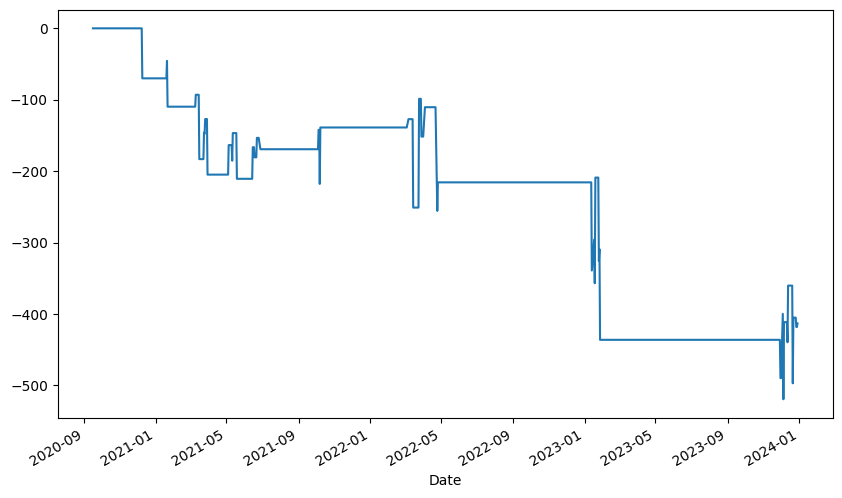

In [3863]:
pair_correlation_trading_strategy['total_position'].cumsum().plot(figsize=(10,6))